In [1]:
# Just used to adjust the way the notebook is displayed
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
sns.set_theme(style="darkgrid", context="talk")

## Data Prep

In [4]:
# Read certain columns of csv into pandas dataframe 
used_car_df = pd.read_csv('used_car_data.csv', 
                          usecols = ['price', 'miles','year', 'make', 
                                     'model', 'trim', 'drivetrain', 
                                     'engine_size'],
                         low_memory=False) 

In [5]:
# Create new columns to make filtering by specific vehicles easier
used_car_df['car_specified'] = used_car_df.apply(lambda x: str(x.make)+'_'+str(x.model)+'_'+str(x.trim)+'_'+str(x.drivetrain)+'_'+str(x.engine_size), axis=1)
used_car_df['car_specified_w_year'] = used_car_df.apply(lambda x: str(x.year)+'_'+str(x.make)+'_'+str(x.model)+'_'+str(x.trim)+'_'+str(x.drivetrain)+'_'+str(x.engine_size), axis=1)

used_car_df = used_car_df.dropna()
used_car_df

price     miles  year       make           model     trim  \
0        31985.0    1141.0  2022      Acura             ILX     Base   
1        27995.0   32775.0  2020      Acura             ILX  Premium   
2        27522.0   22838.0  2021      Acura             ILX  Premium   
3        26500.0   19515.0  2019      Acura             ILX  Premium   
4        29484.0   36925.0  2020      Acura             ILX  Premium   
...          ...       ...   ...        ...             ...      ...   
2709192  19991.0   77967.0  2018       Ford          Escape        S   
2709193  16991.0  111989.0  2017       Ford          Escape       SE   
2709194  43541.0   71664.0  2019  Chevrolet  Silverado 1500       LT   
2709195  30991.0   22918.0  2021      Buick       Encore GX   Select   
2709196  36888.0   28514.0  2020       Ford        Explorer      XLT   

        drivetrain  engine_size                        car_specified  \
0              FWD          2.4               Acura_ILX_Base_FWD_2.4   
1              FWD          2.4            Acura_ILX_Premium_FWD_2.4   
2              FWD          2.4            Acura_ILX_Premium_FWD_2.4   
3              FWD          2.4            Acura_ILX_Premium_FWD_2.4   
4              FWD          2.4            Acura_ILX_Premium_FWD_2.4   
...            ...          ...                                  ...   
2709192        FWD          2.5                Ford_Escape_S_FWD_2.5   
2709193        FWD          1.5               Ford_Escape_SE_FWD_1.5   
2709194        4WD          5.3  Chevrolet_Silverado 1500_LT_4WD_5.3   
2709195        FWD          1.3       Buick_Encore GX_Select_FWD_1.3   
2709196        RWD          2.3            Ford_Explorer_XLT_RWD_2.3   

                             car_specified_w_year  
0                     2022_Acura_ILX_Base_FWD_2.4  
1                  2020_Acura_ILX_Premium_FWD_2.4  
2                  2021_Acura_ILX_Premium_FWD_2.4  
3                  2019_Acura_ILX_Premium_FWD_2.4  
4                  2020_Acura_ILX_Premium_FWD_2.4  
...                                           ...  
2709192                2018_Ford_Escape_S_FWD_2.5  
2709193               2017_Ford_Escape_SE_FWD_1.5  
2709194  2019_Chevrolet_Silverado 1500_LT_4WD_5.3  
2709195       2021_Buick_Encore GX_Select_FWD_1.3  
2709196            2020_Ford_Explorer_XLT_RWD_2.3  

[2311324 rows x 10 columns]

In [6]:
# Found a specific outlier that had an absurdly high price, I think it was an error
used_car_df.loc[1301764]

price                                      388575.0
miles                                       83449.0
year                                           2016
make                                           Ford
model                                         F-150
trim                                            XLT
drivetrain                                      4WD
engine_size                                     2.7
car_specified                Ford_F-150_XLT_4WD_2.7
car_specified_w_year    2016_Ford_F-150_XLT_4WD_2.7
Name: 1301764, dtype: object

In [7]:
# Getting rid of the outlier
used_car_df = used_car_df.drop(labels=1301764, axis=0)

In [8]:
# Getting counts of the most popular vehicles (without year specified)
car_popularity = Counter(used_car_df['car_specified'])
most_common_cars_counts = car_popularity.most_common(10)
most_common_cars_counts

[('Chevrolet_Silverado 1500_LT_4WD_5.3', 21800),
 ('Toyota_Corolla_LE_FWD_1.8', 14223),
 ('Nissan_Altima_S_FWD_2.5', 12203),
 ('Toyota_Camry_SE_FWD_2.5', 11838),
 ('Ford_F-150_XLT_4WD_3.5', 11406),
 ('Chevrolet_Malibu_1LT_FWD_1.5', 10773),
 ('Jeep_Grand Cherokee_Limited_4WD_3.6', 9694),
 ('Ford_F-150_XLT_4WD_2.7', 9641),
 ('Toyota_Camry_LE_FWD_2.5', 9385),
 ('Chevrolet_Equinox_LT_FWD_1.5', 8967)]

In [9]:
# Getting counts of the most popular vehicles (with year specified)
car_popularity_w_year = Counter(used_car_df['car_specified_w_year'])
most_common_cars_counts_w_year = car_popularity_w_year.most_common(14)
most_common_cars_counts_w_year

[('2018_Chevrolet_Silverado 1500_LT_4WD_5.3', 4896),
 ('2020_Toyota_Corolla_LE_FWD_1.8', 4514),
 ('2019_Chevrolet_Equinox_LT_FWD_1.5', 3949),
 ('2020_Chevrolet_Malibu_1LT_FWD_1.5', 3947),
 ('2019_Nissan_Sentra_SV_FWD_1.8', 3894),
 ('2019_RAM_Ram 1500 Pickup_Big Horn/Lone Star_4WD_5.7', 3726),
 ('2020_Nissan_Altima_S_FWD_2.5', 3439),
 ('2019_Ford_F-150_XLT_4WD_2.7', 3274),
 ('2019_Chevrolet_Equinox_LT_4WD_1.5', 3024),
 ('2018_Ford_F-150_XLT_4WD_2.7', 2953),
 ('2017_Chevrolet_Silverado 1500_LT_4WD_5.3', 2929),
 ('2020_RAM_Ram 1500 Pickup_Big Horn/Lone Star_4WD_5.7', 2862),
 ('2019_Jeep_Cherokee_Limited_4WD_3.2', 2821),
 ('2019_Honda_Civic_LX_FWD_2.0', 2819)]

In [10]:
# Making lists of the most popular vehicle names without the counts attached so they can be easily iterated over later 
most_common_cars = [x[0] for x in most_common_cars_counts]
most_common_cars_w_year = [x[0] for x in most_common_cars_counts_w_year]

## Year of Vehicle and Price

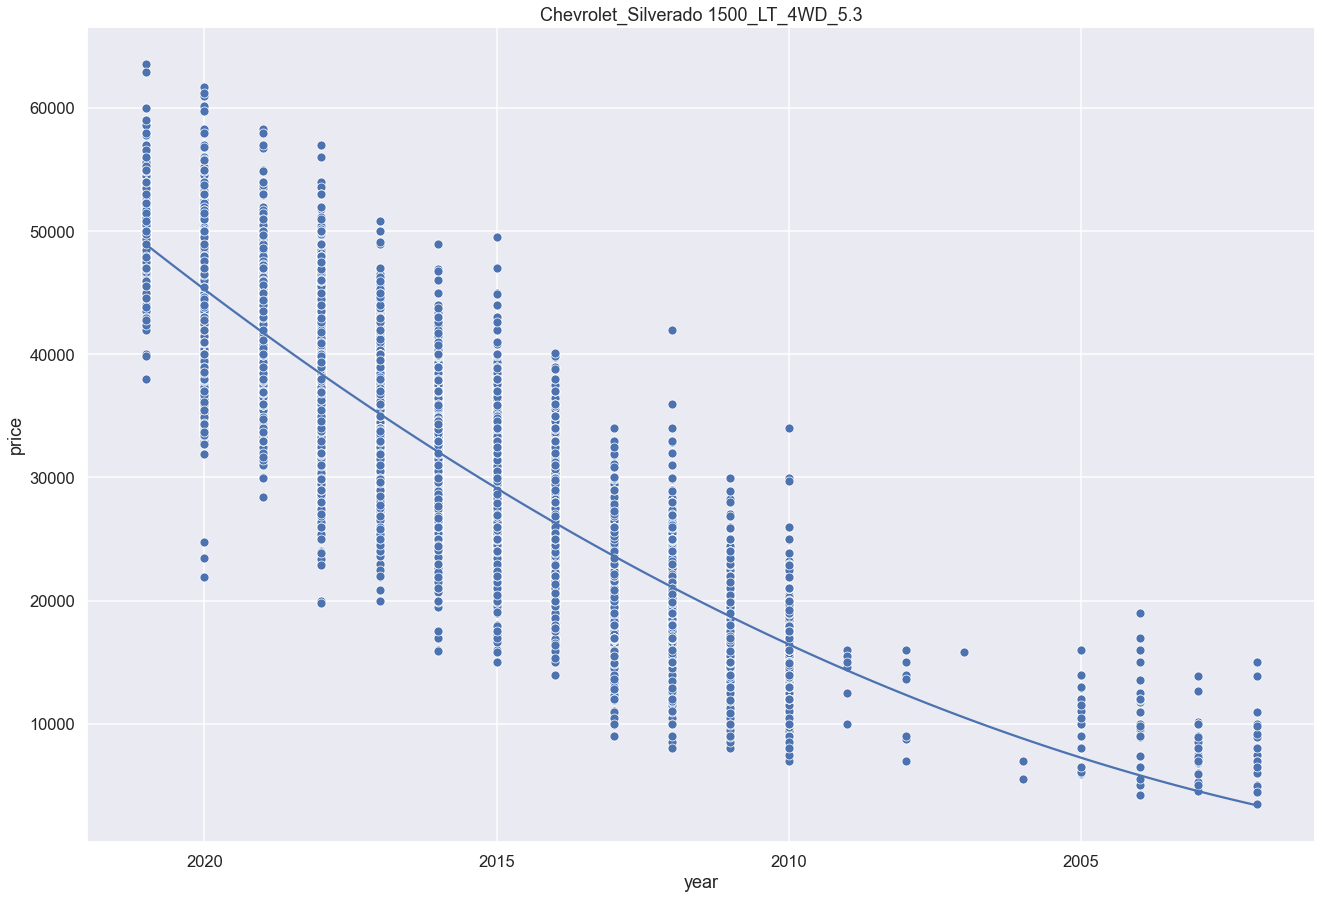

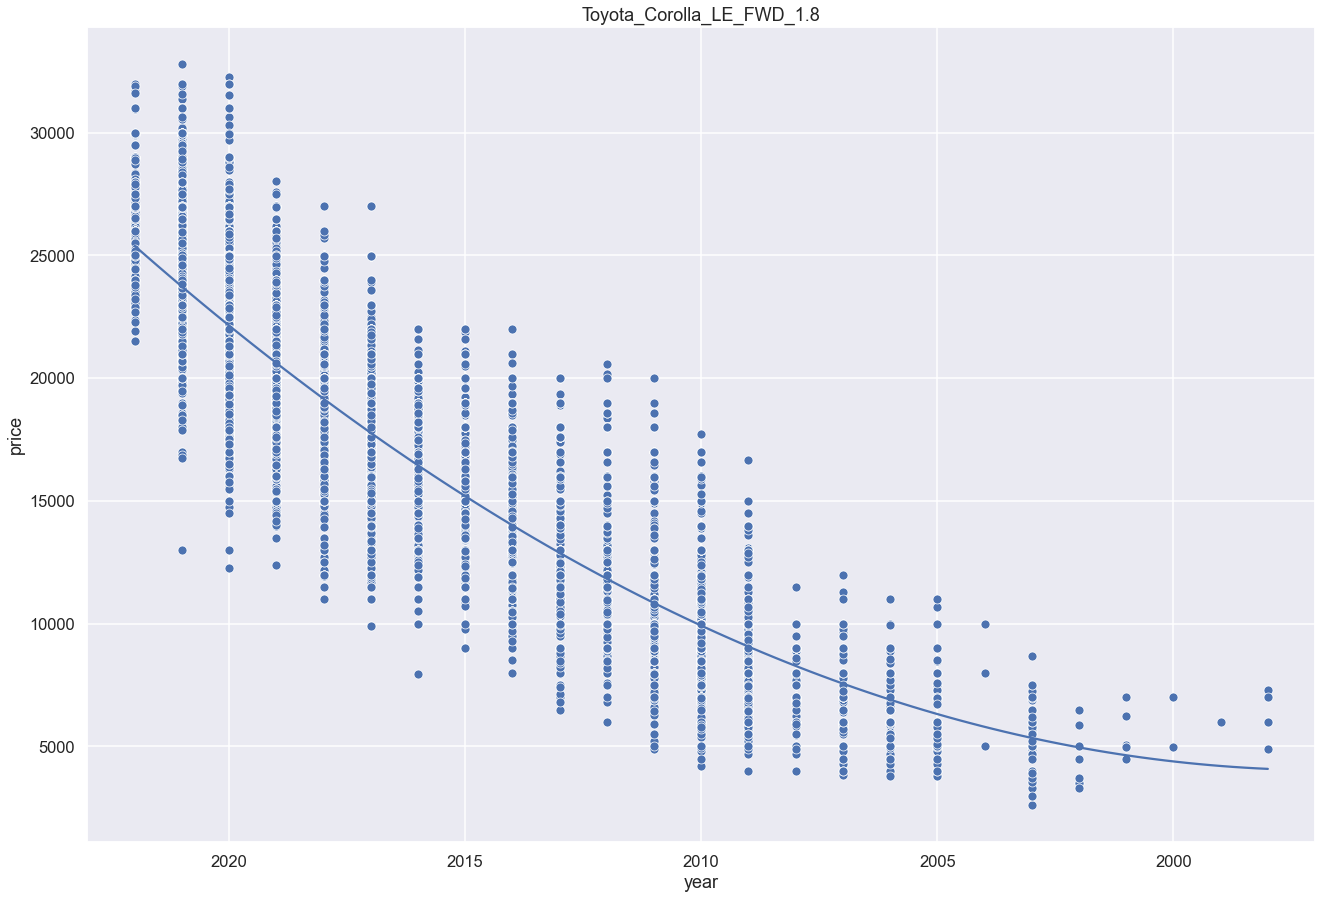

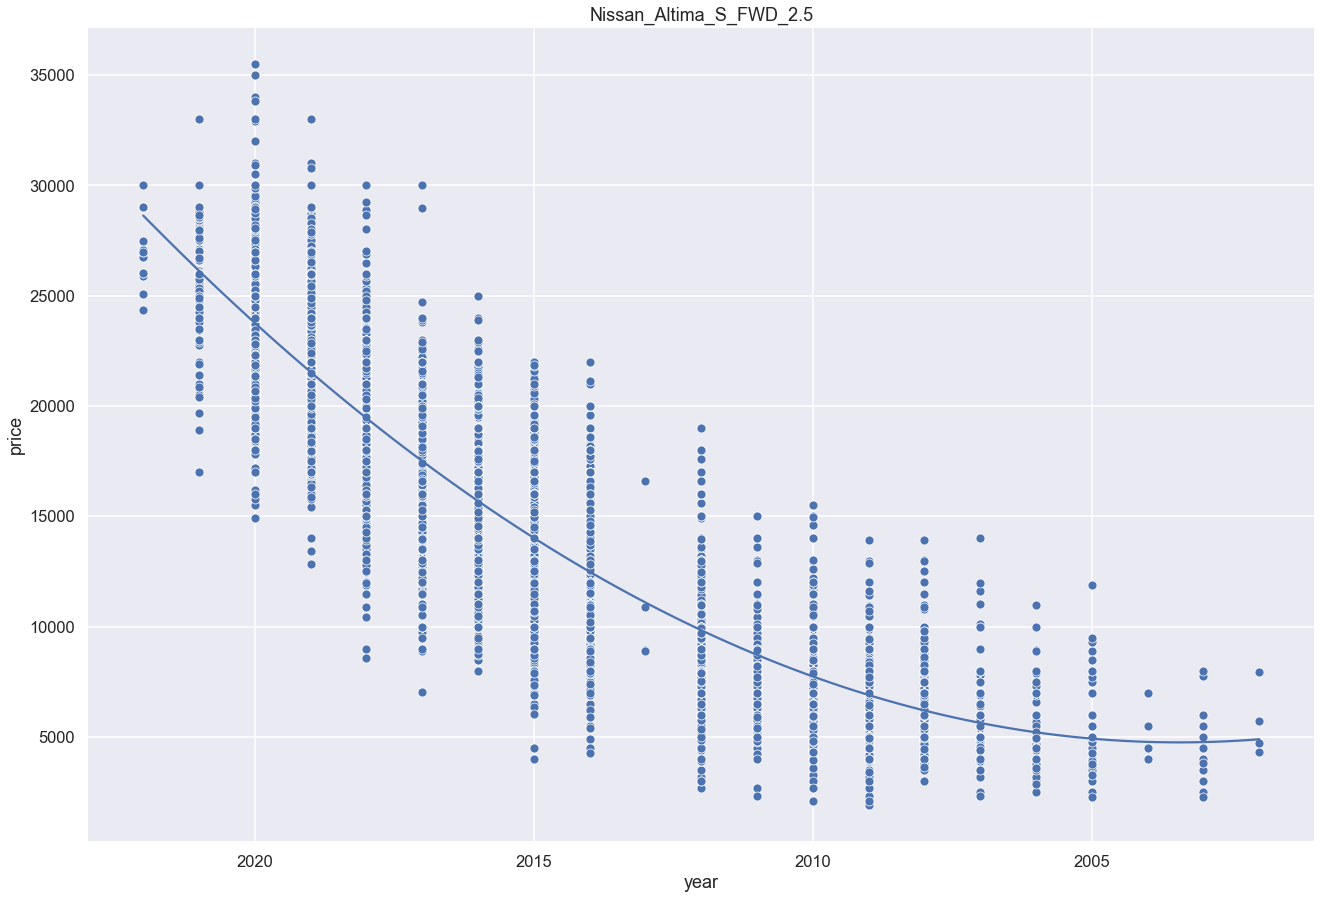

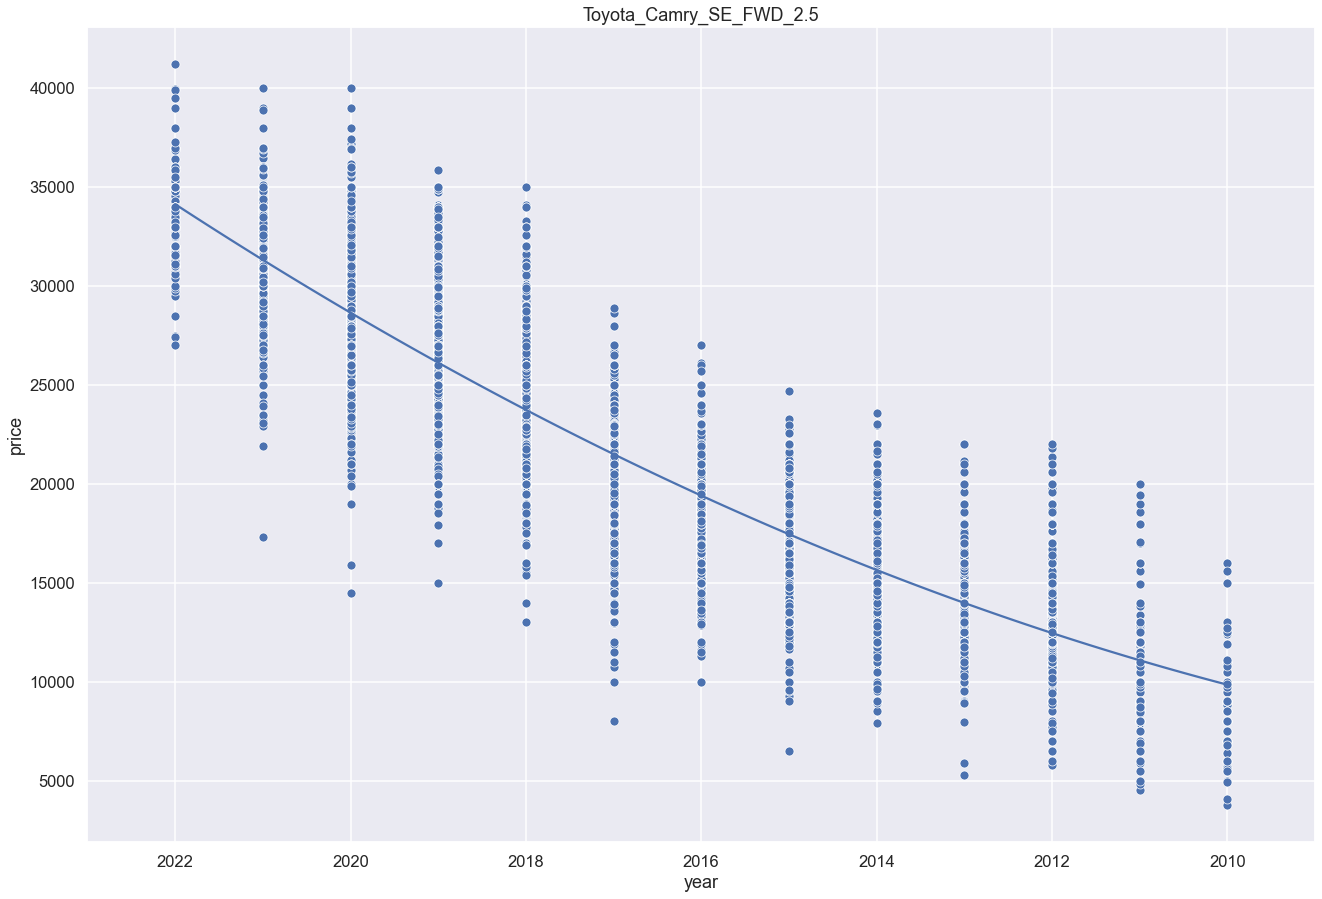

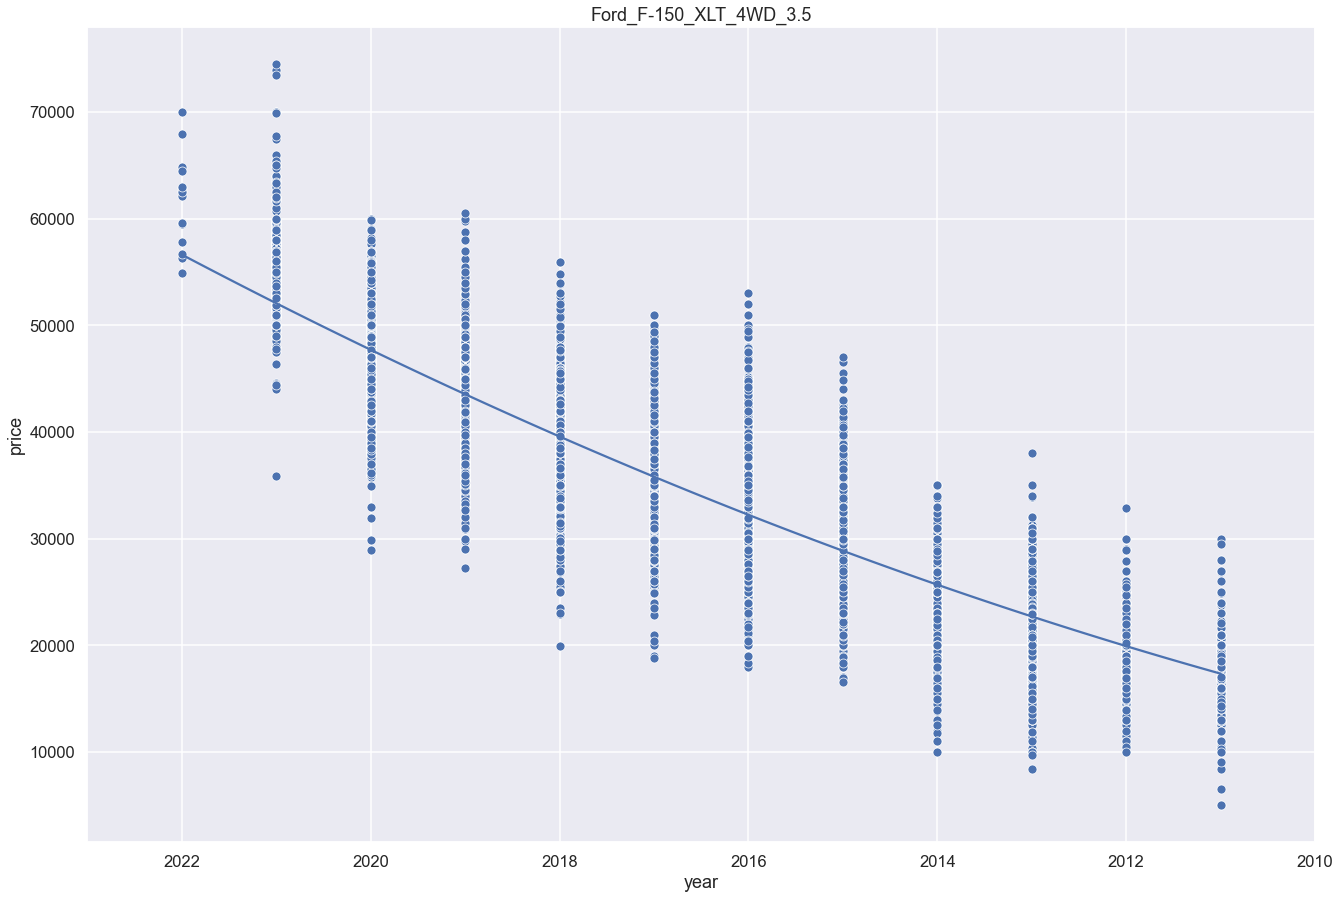

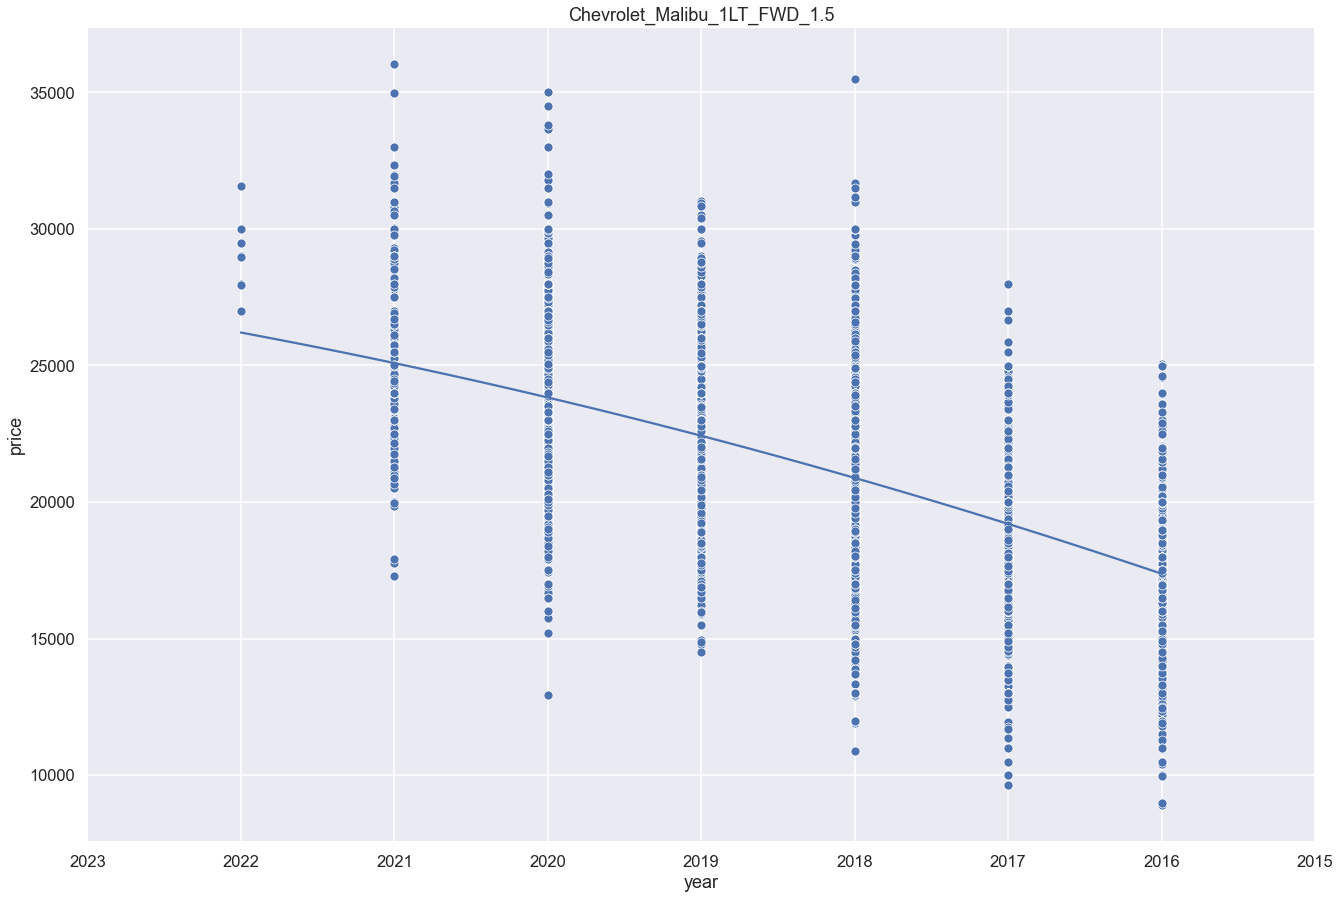

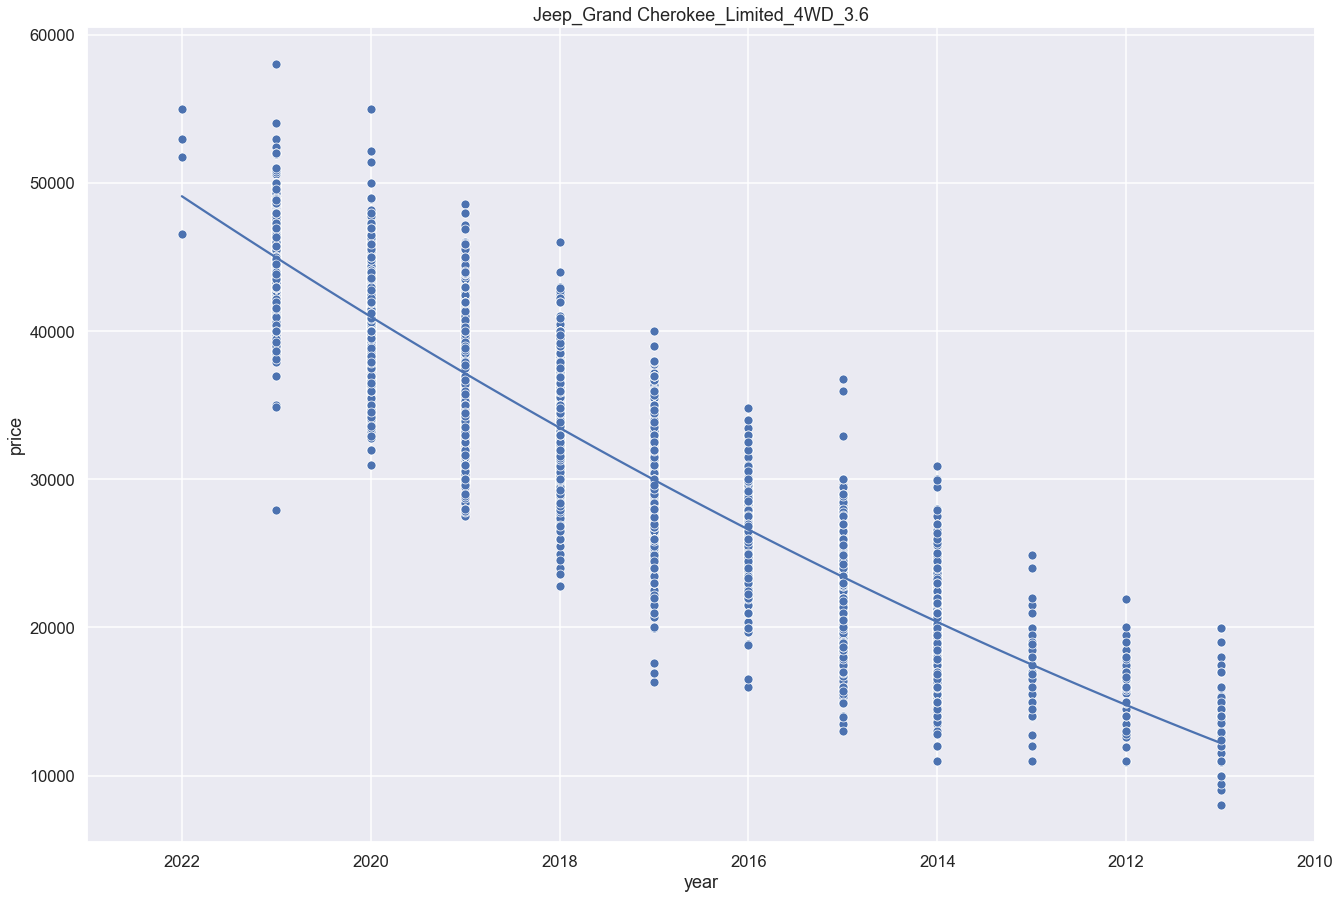

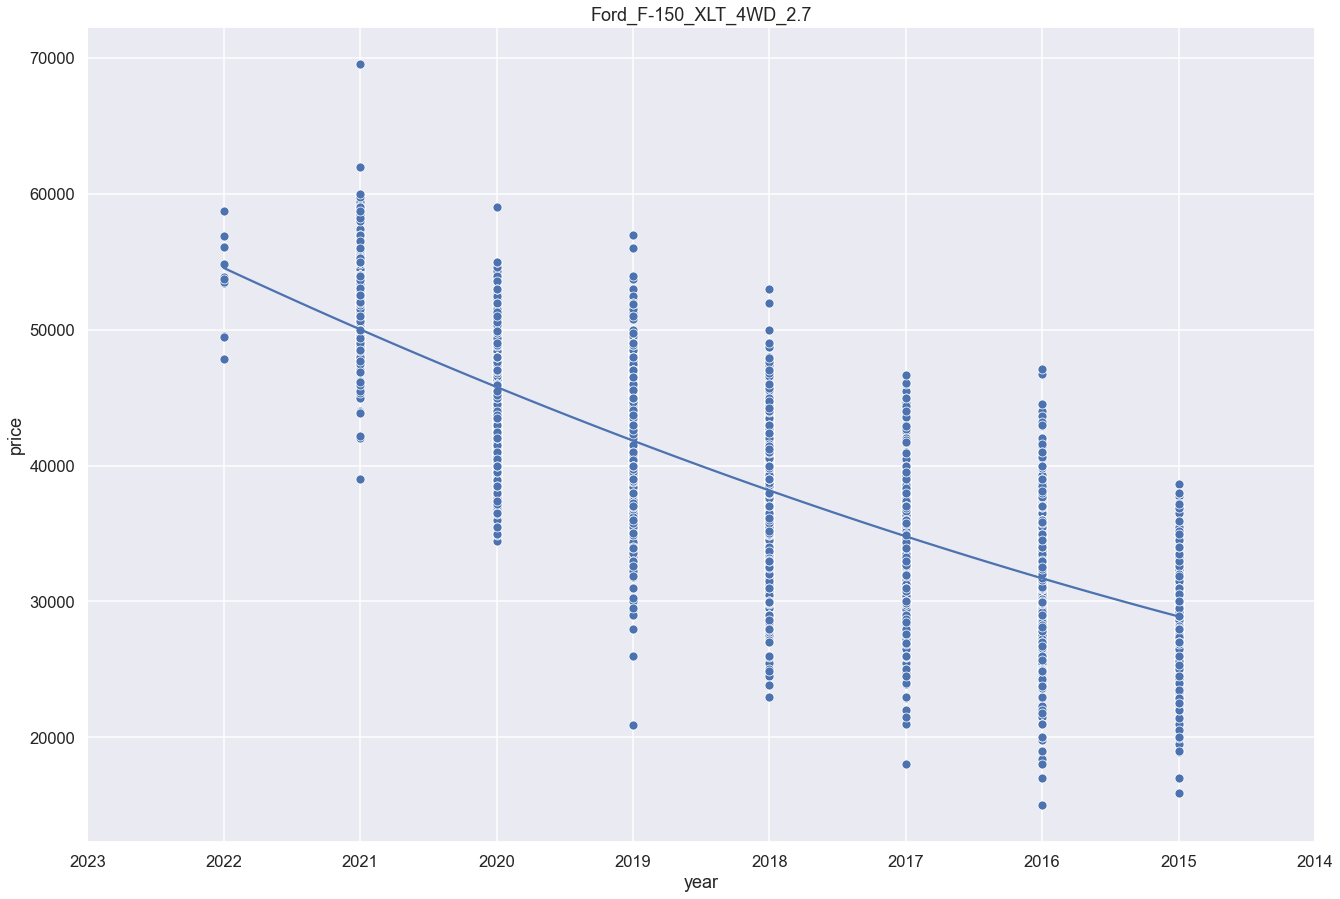

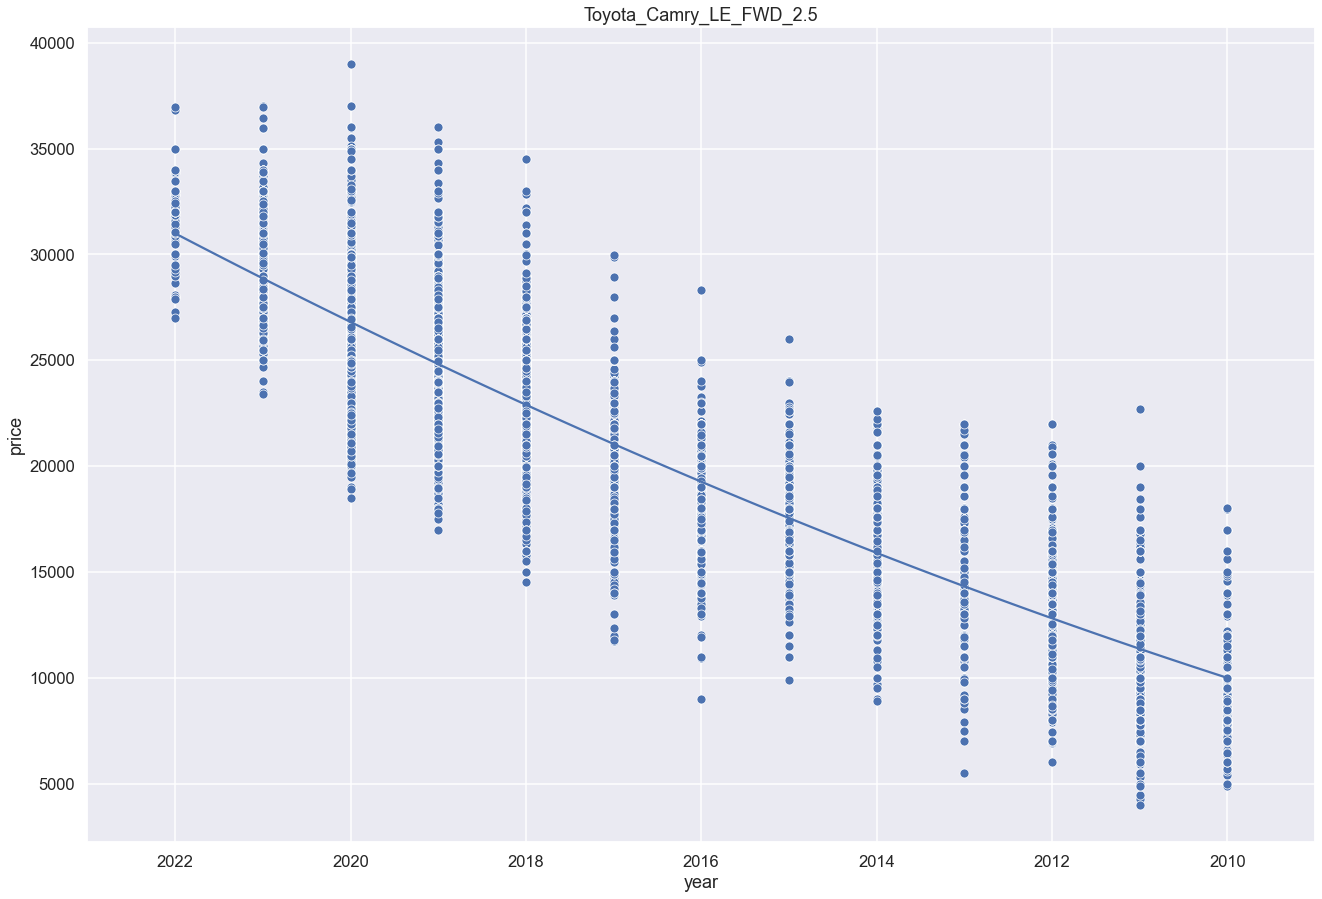

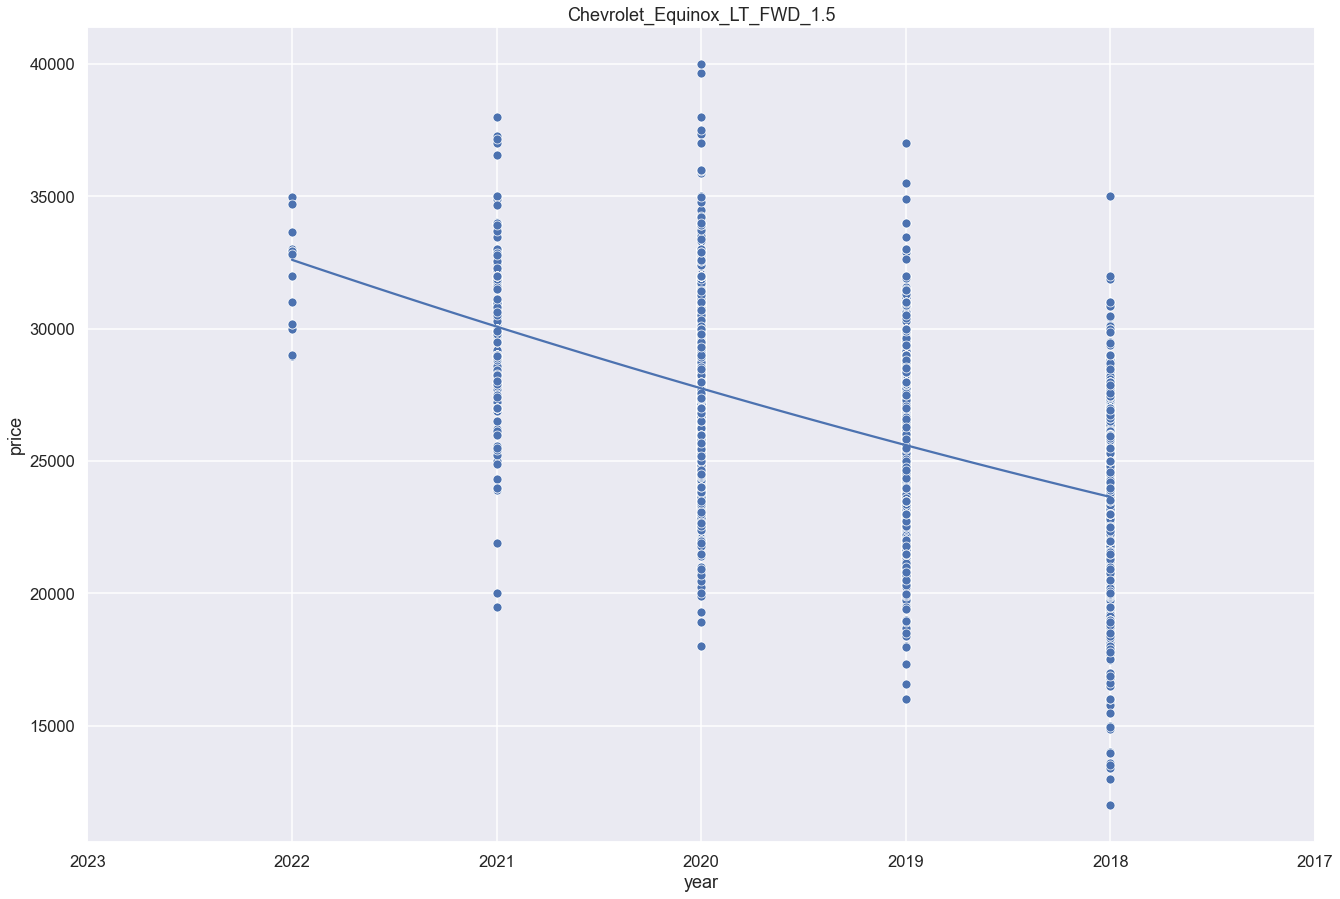

In [11]:
#### Empty list to hold fitted lines to plot later without the scatterplots 
fitted_lines = []
# Iterating over the most common cars to plot their data points (year and price) and fitted lines
for car in most_common_cars:
    temp_single_car_df = used_car_df[used_car_df['car_specified'] == car]
    x_year = temp_single_car_df['year']
    y_price = temp_single_car_df['price']
    
    sns.scatterplot(x=x_year, y=y_price).set(title=car)
    plt.xlim(x_year.max()+1, x_year.min()-1) # Sets the proper x axis limits and makes it descending order
    plt.locator_params(integer=True)

    poly_reg = np.poly1d(np.polyfit(x_year, y_price, 2)) # Fits degree 2 polynomial to data
    line = np.linspace(x_year.min(), x_year.max(), 100)
    plt.plot(line, poly_reg(line))
    
    plt.gcf().set_size_inches(22, 15)
    plt.show()
    
    fitted_lines.append((car, poly_reg, line))


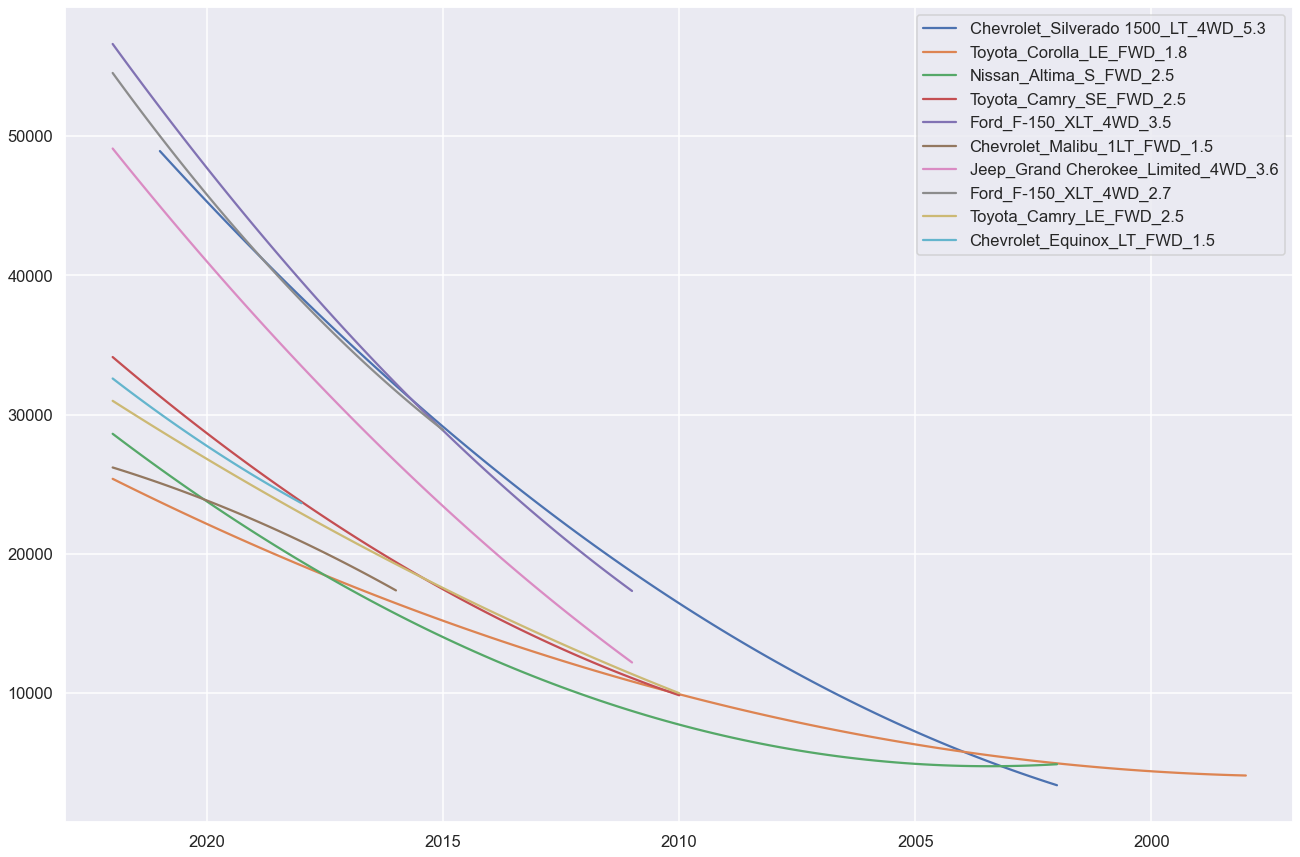

In [12]:
# Iterate over the list we created in the last cell to plot each respective line
for tup in fitted_lines:
    car, poly_reg, line = tup
    plt.plot(line, poly_reg(line), label=car)
    
plt.gcf().set_size_inches(22, 15)
plt.legend()
plt.xlim(2023, 1997)
plt.show()

## Amount of Miles and Price

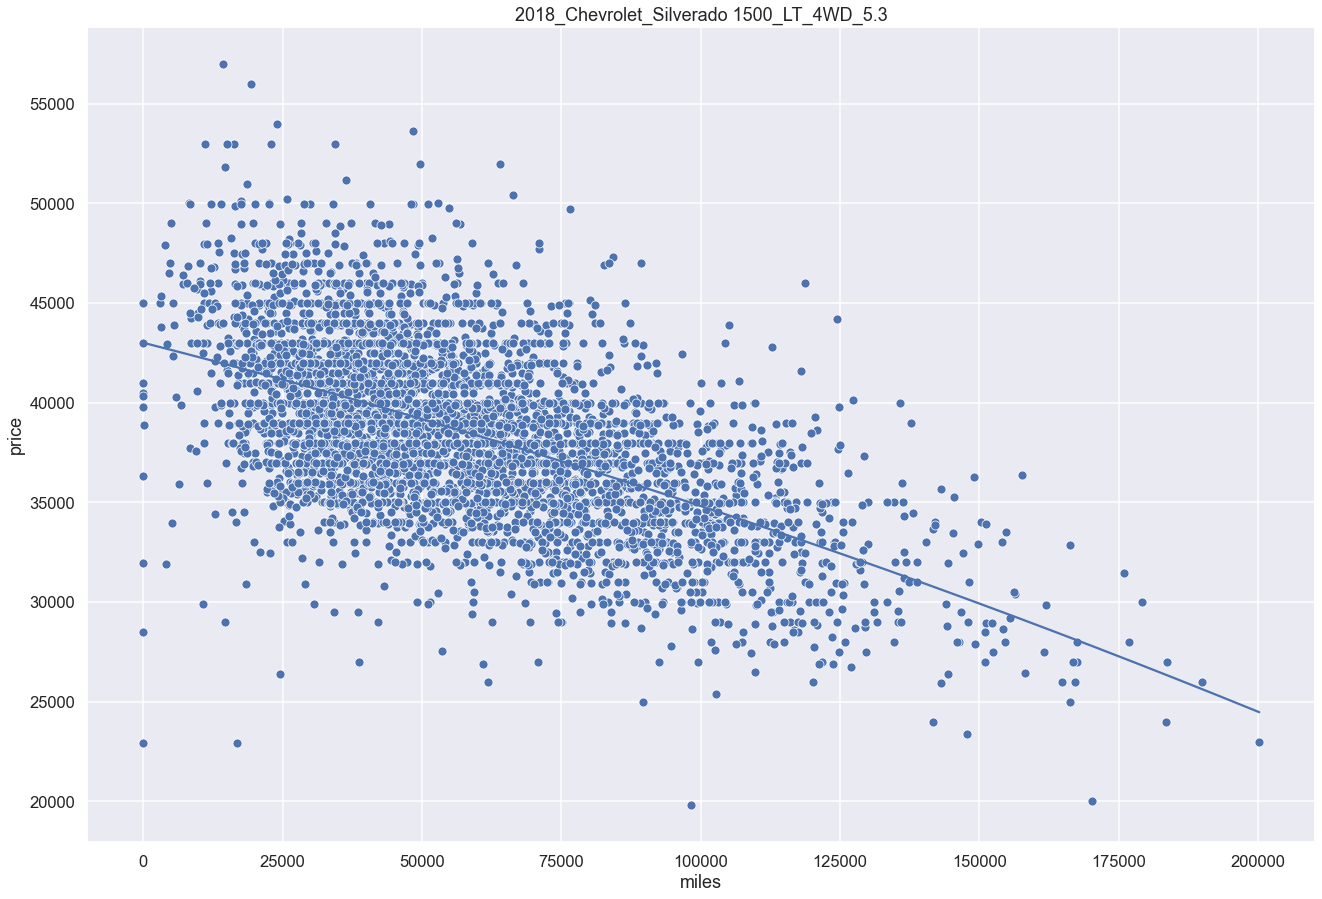

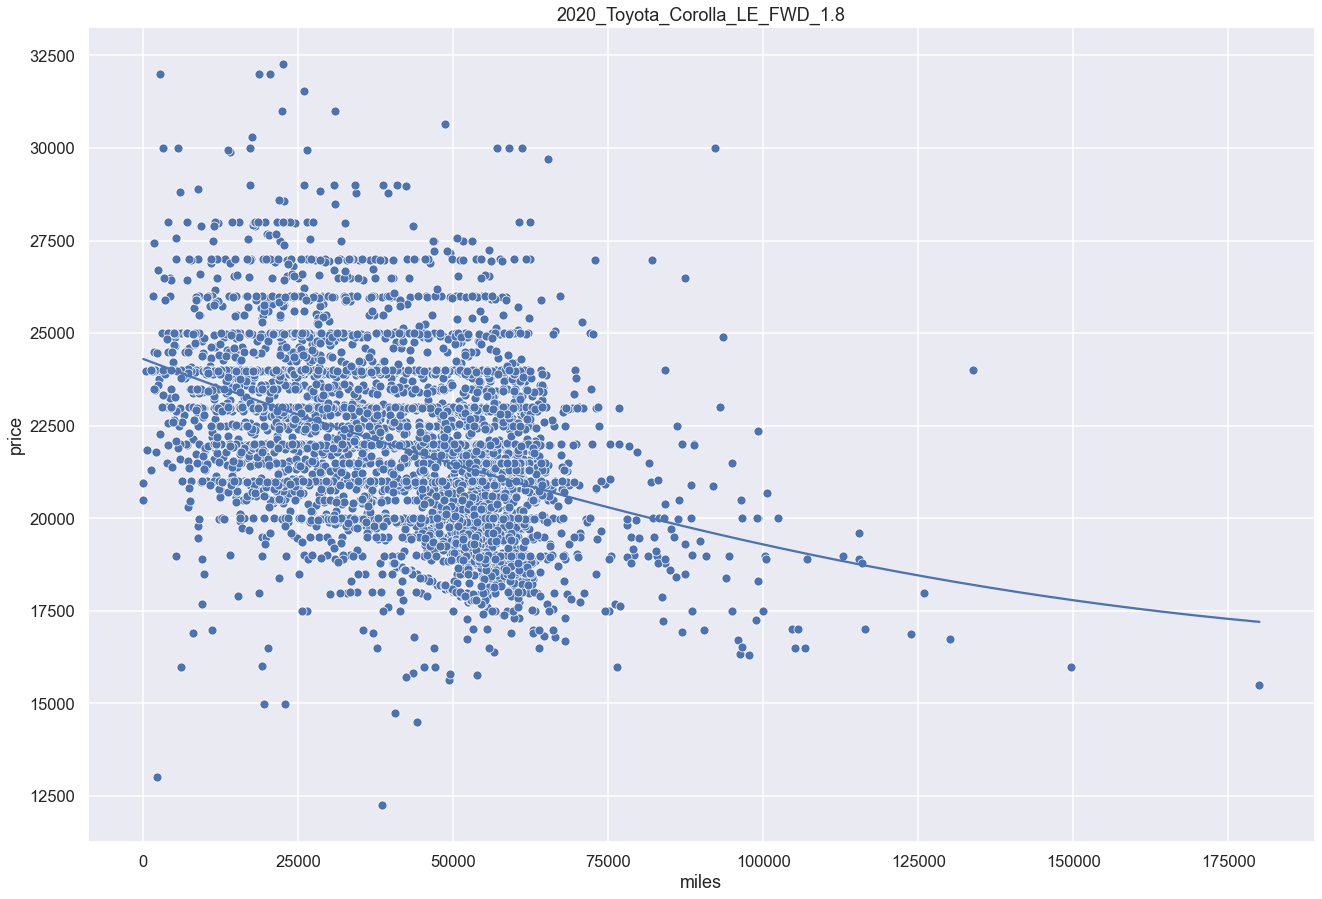

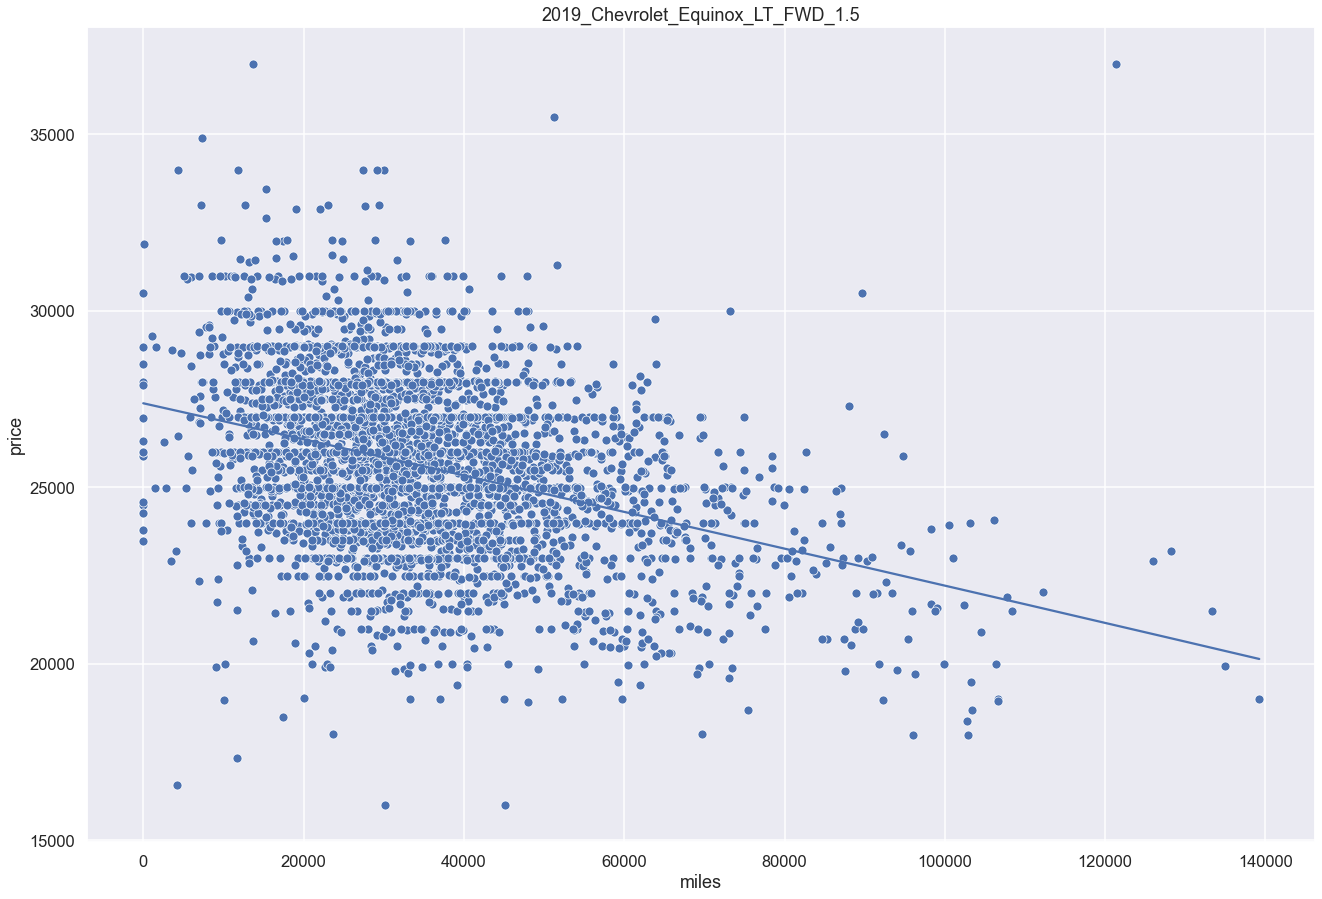

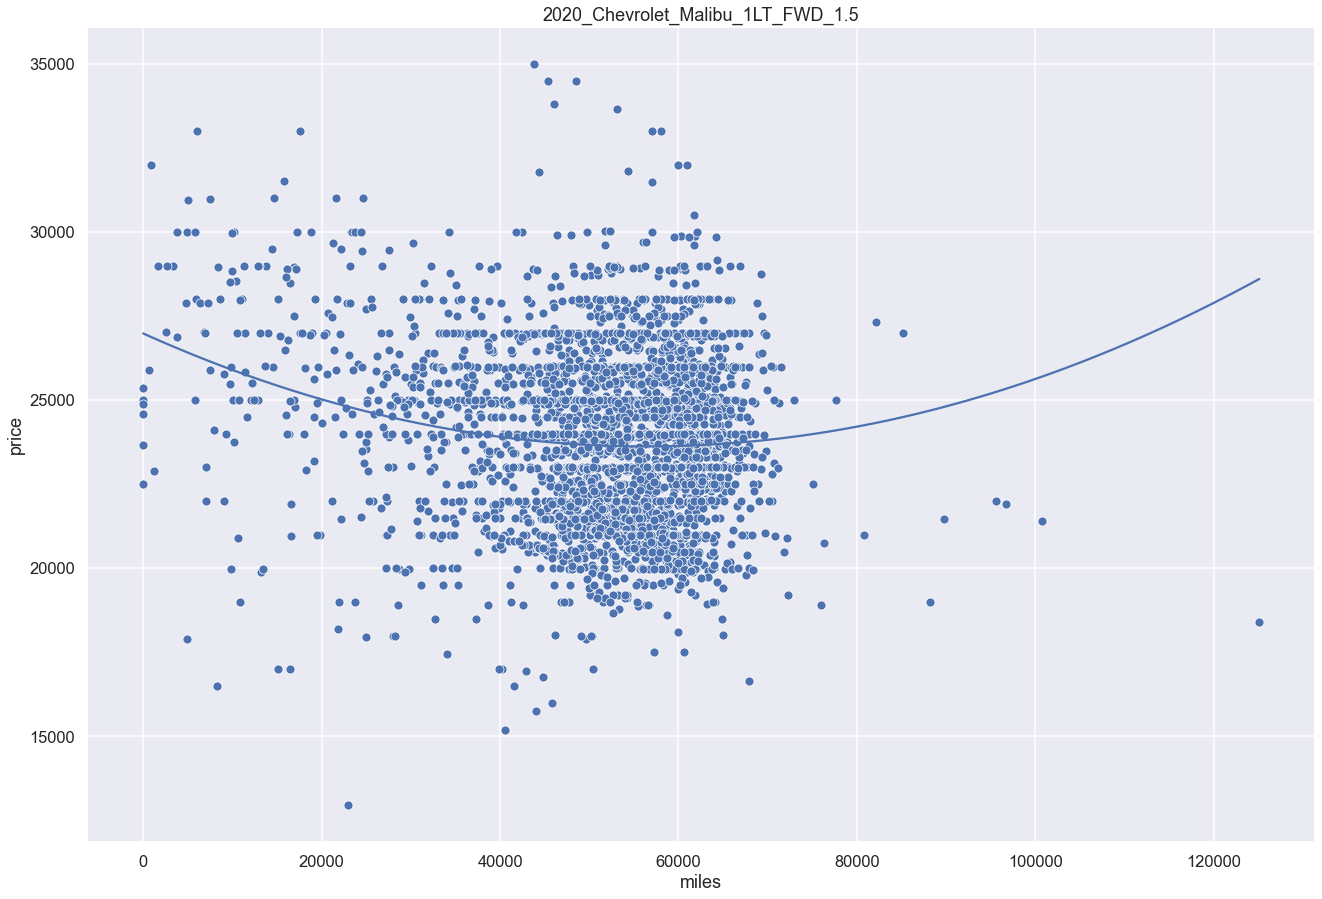

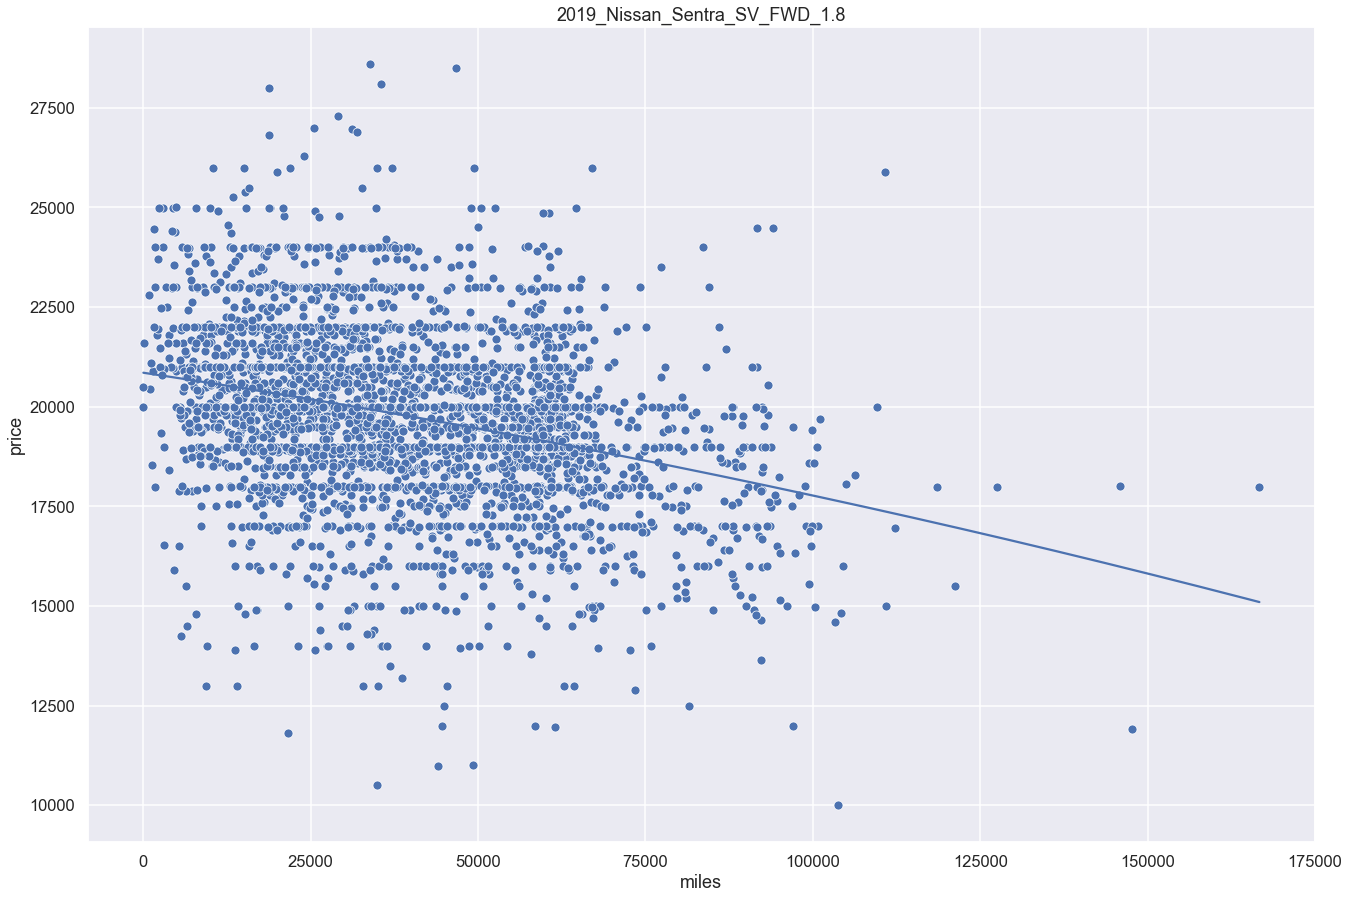

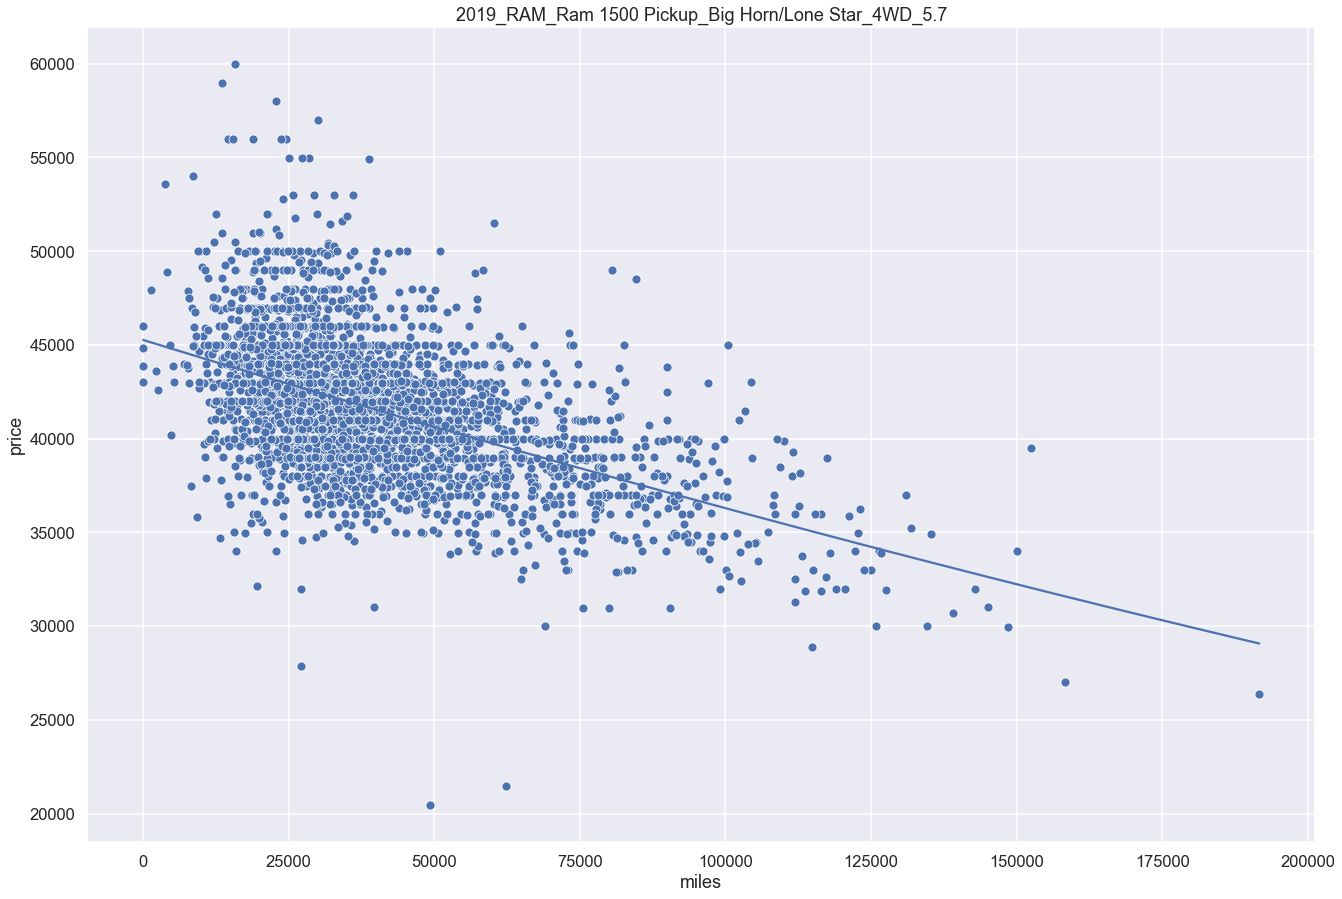

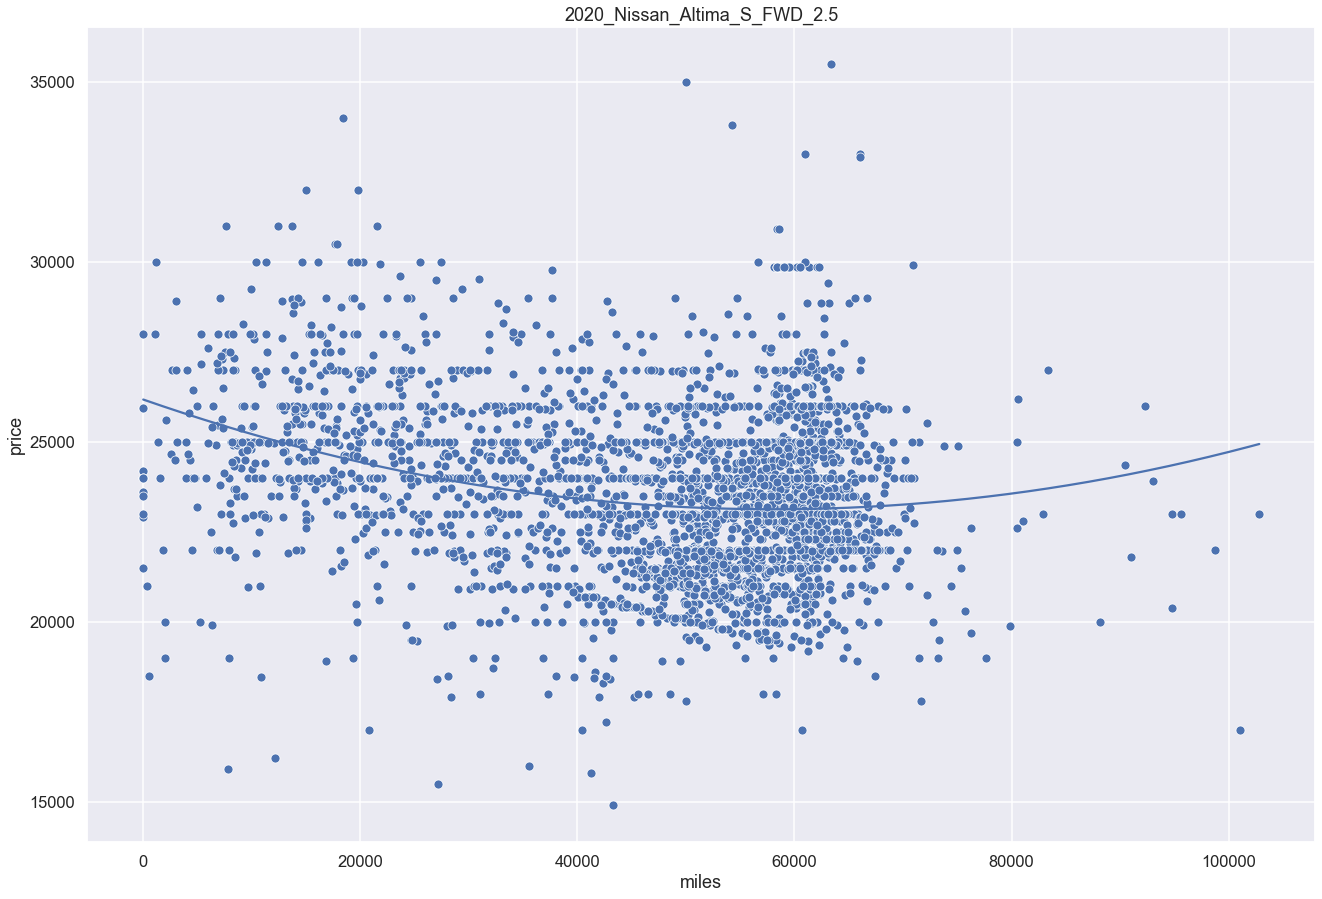

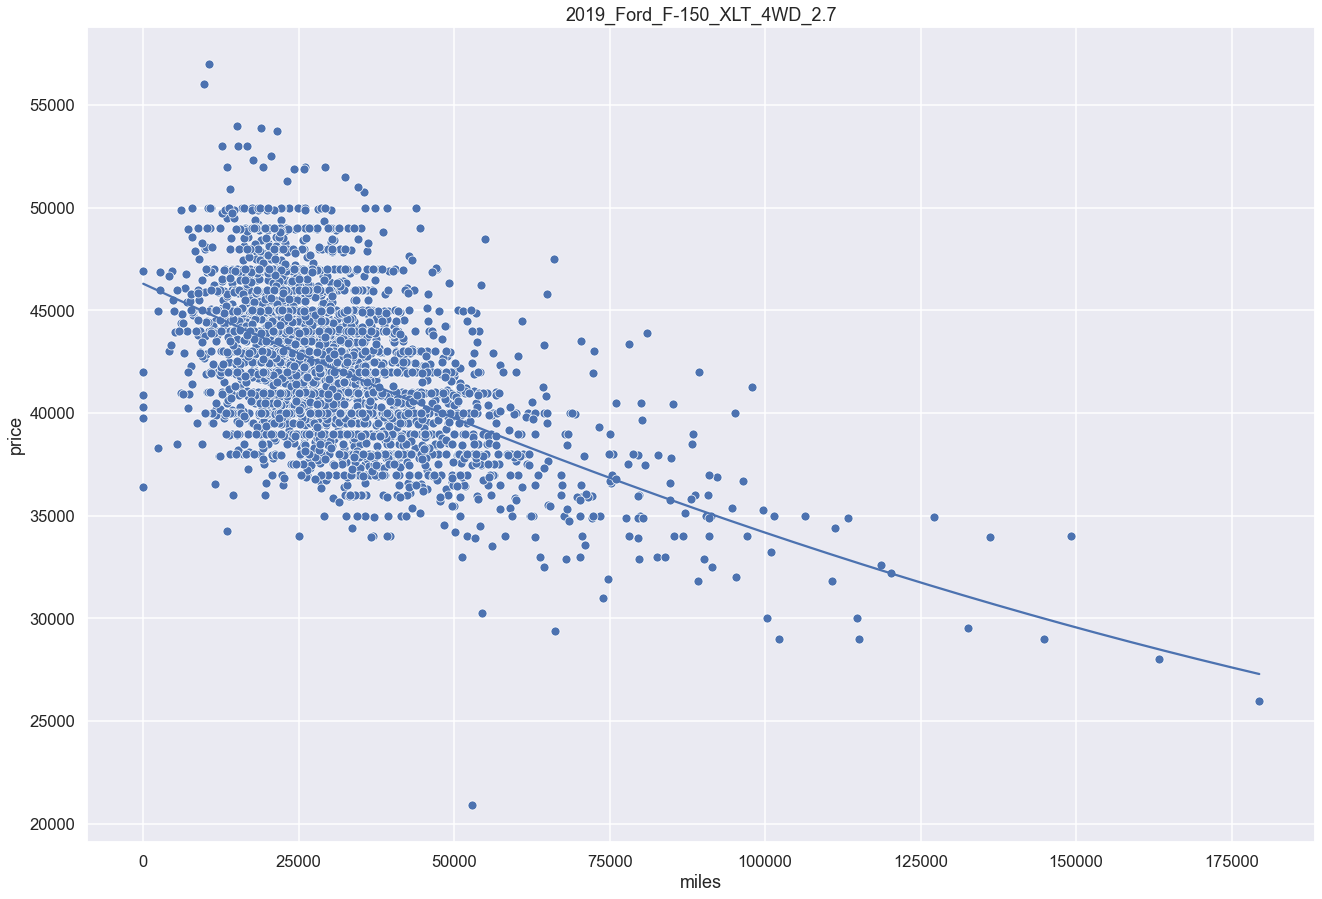

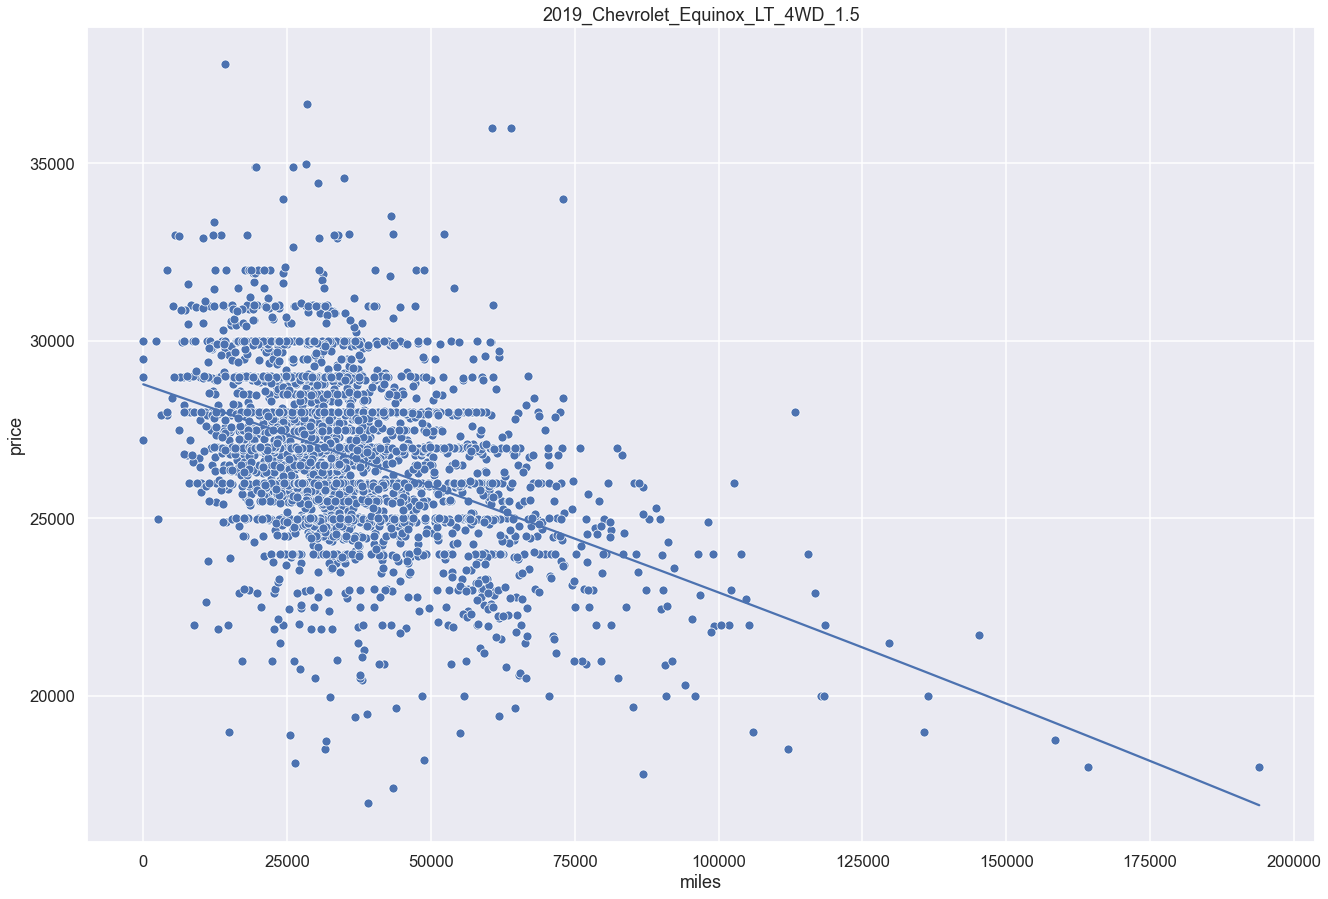

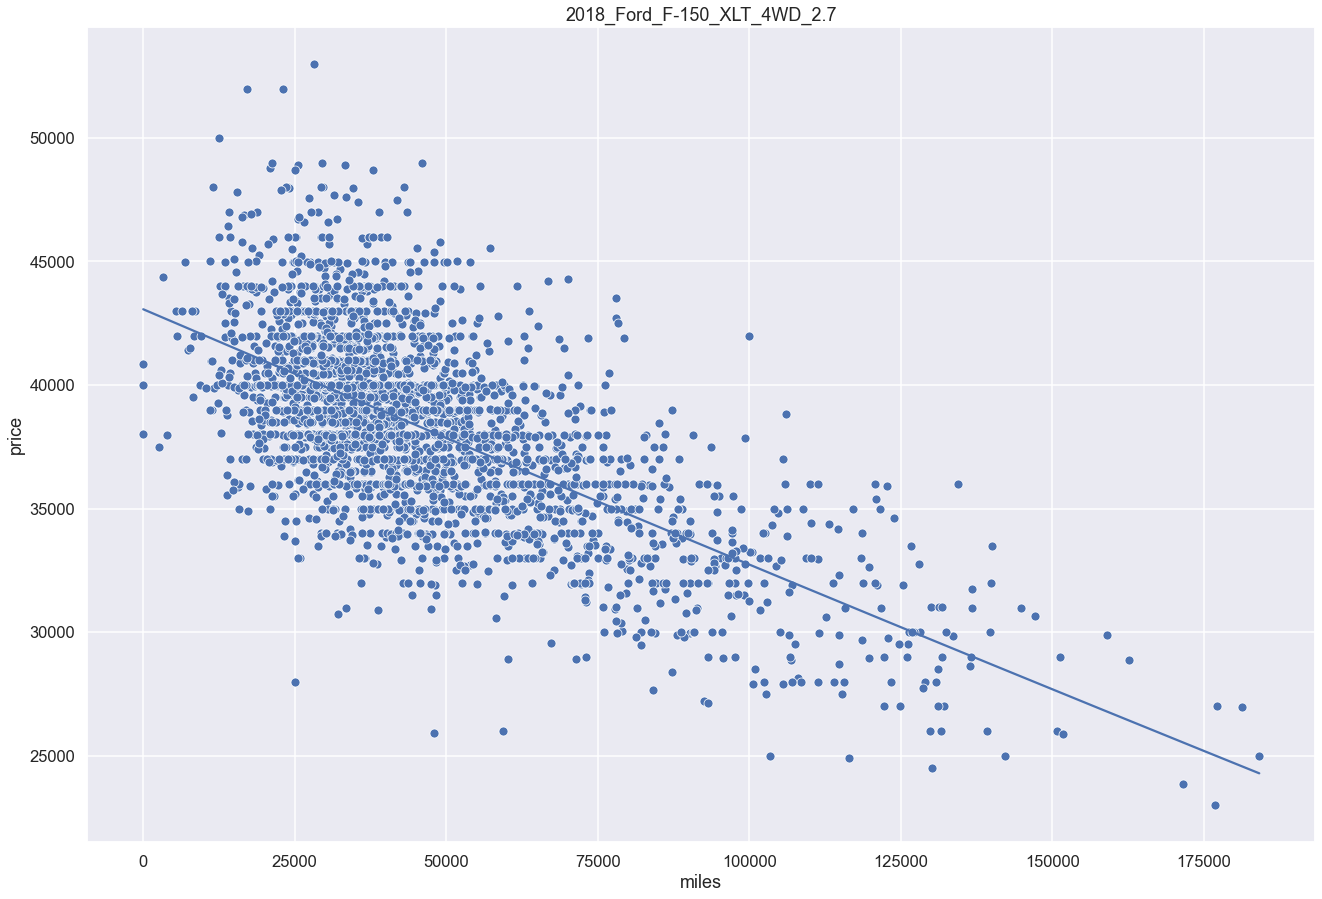

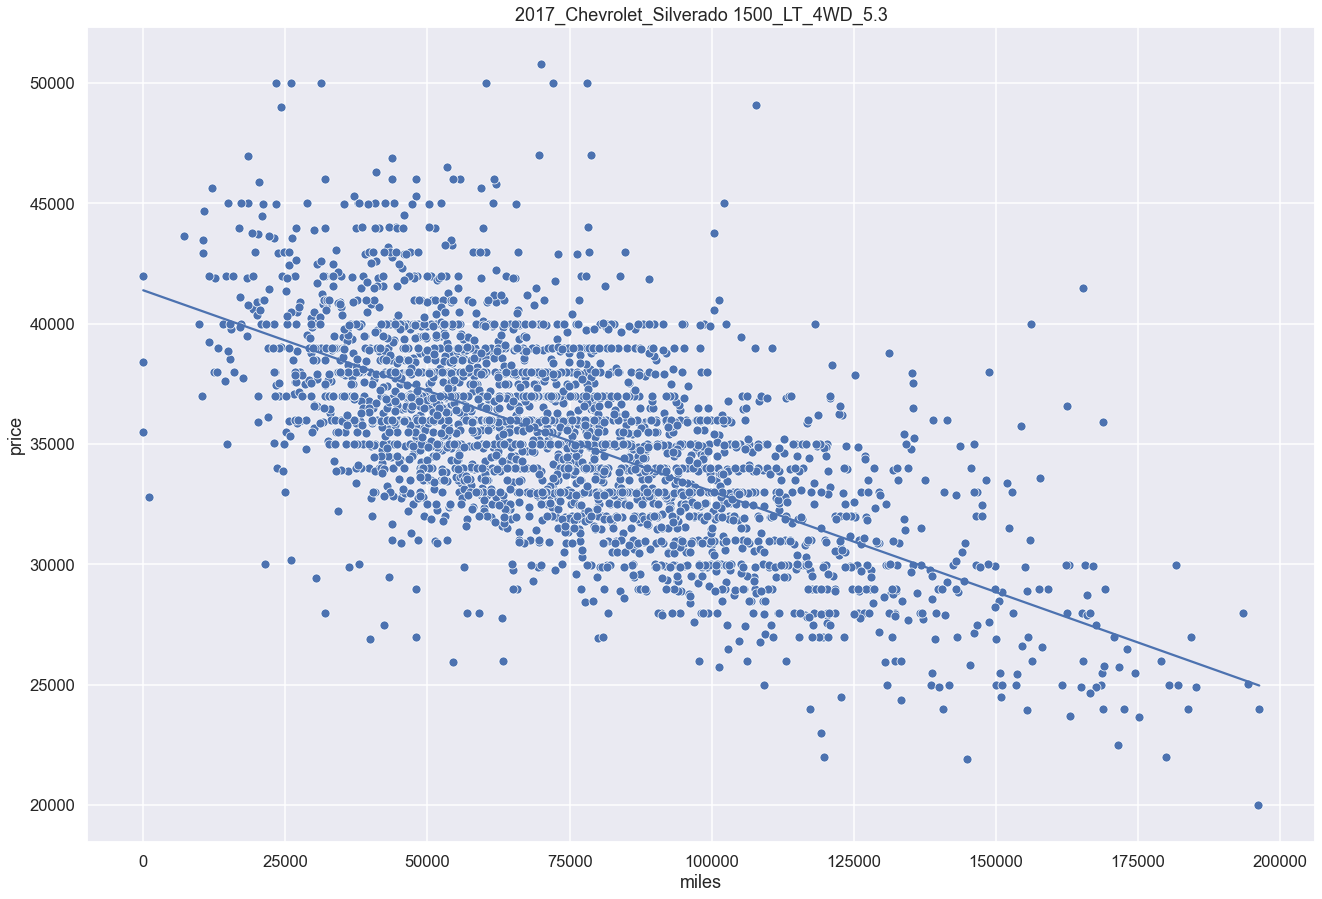

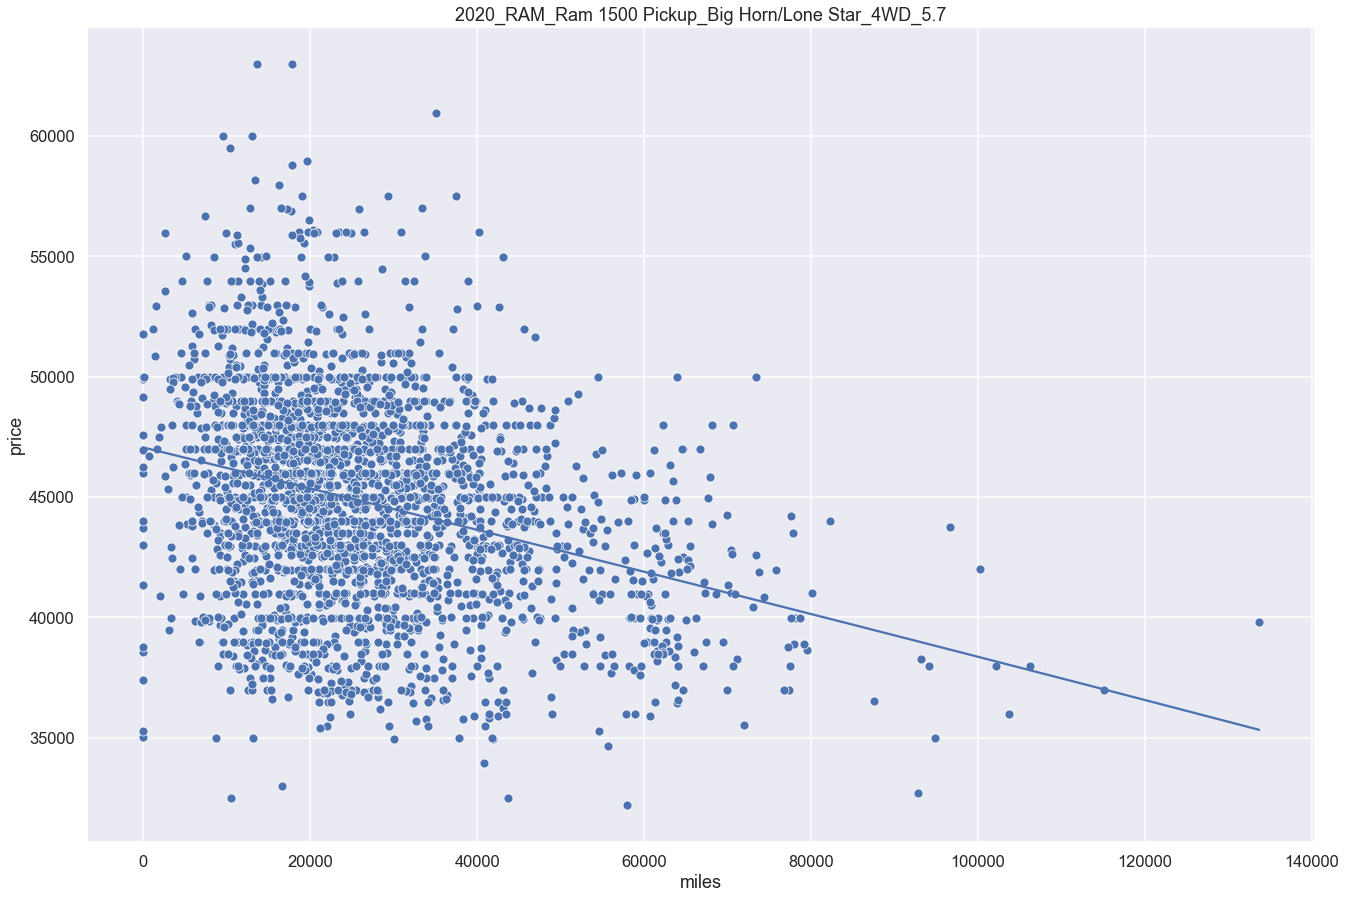

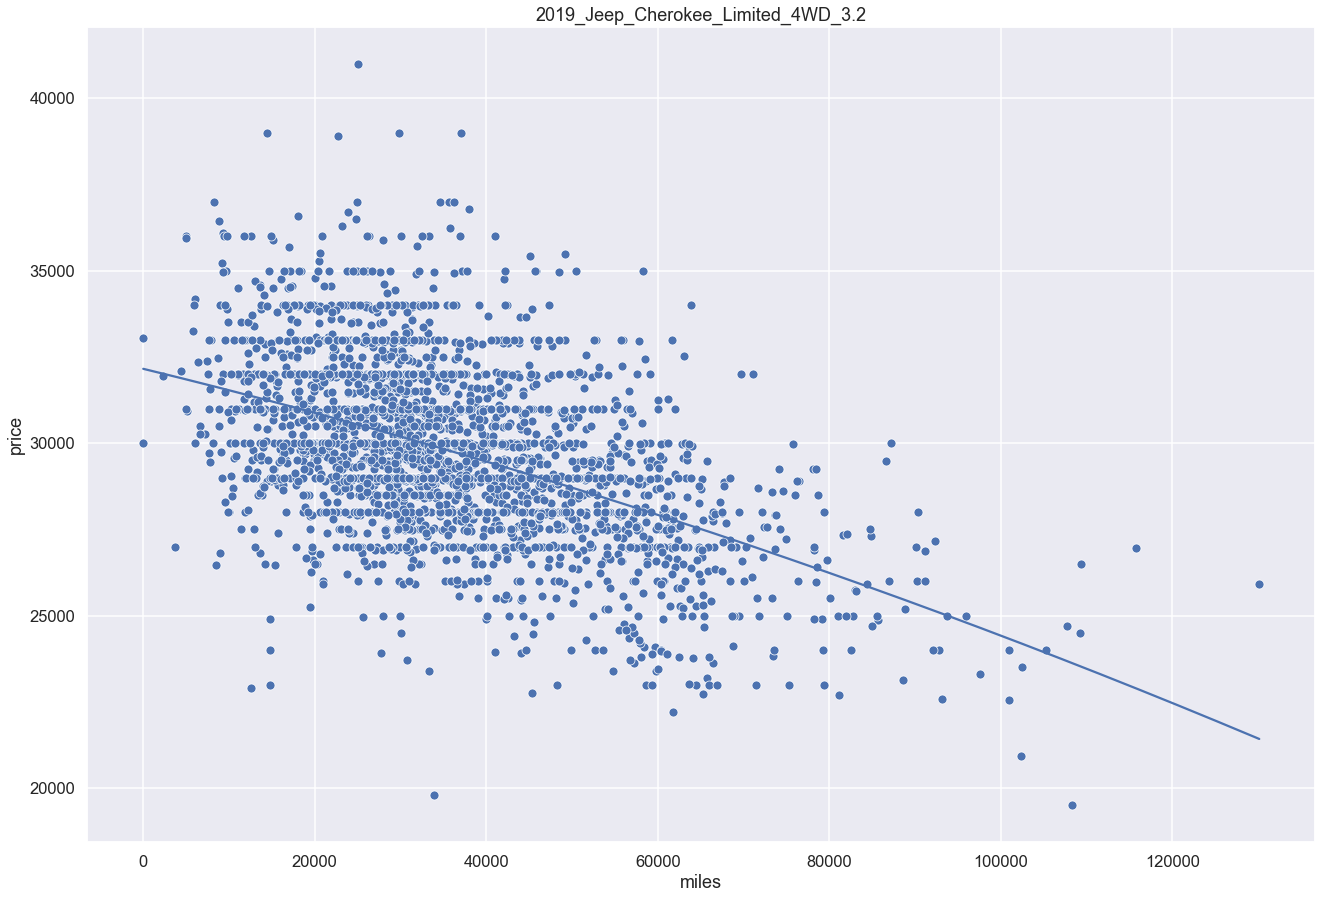

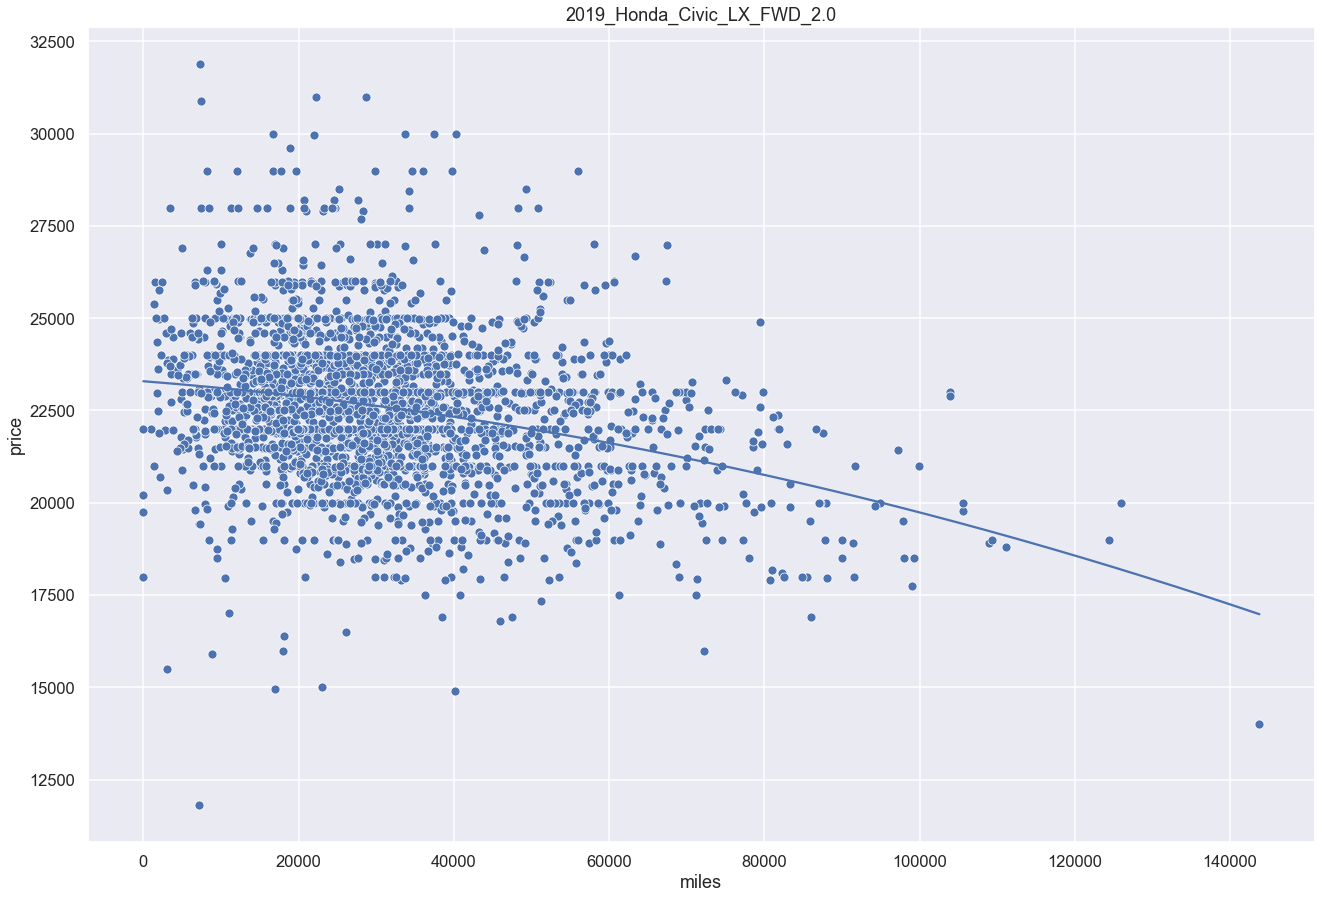

In [13]:
# Empty list to hold fitted lines to plot later without the scatterplots 
fitted_lines = []
# Iterating over the most common cars to plot their data points and fitted lines
for car in most_common_cars_w_year:
    temp_single_car_df = used_car_df[used_car_df['car_specified_w_year'] == car]
    # It seemed that almost everything over 205k miles was an outlier and I believe had some kind of error  
    temp_single_car_df = temp_single_car_df[temp_single_car_df['miles'] < 205000]
    x_miles = temp_single_car_df['miles']
    y_price = temp_single_car_df['price']
    
    sns.scatterplot(x=x_miles, y=y_price).set(title=car)

    poly_reg = np.poly1d(np.polyfit(x_miles, y_price, 2)) # Fits degree 2 polynomial to data
    line = np.linspace(x_miles.min(), x_miles.max(), 1000)
    plt.plot(line, poly_reg(line))
    
    plt.gcf().set_size_inches(22, 15)
    plt.show()
    
    fitted_lines.append((car, poly_reg, line))

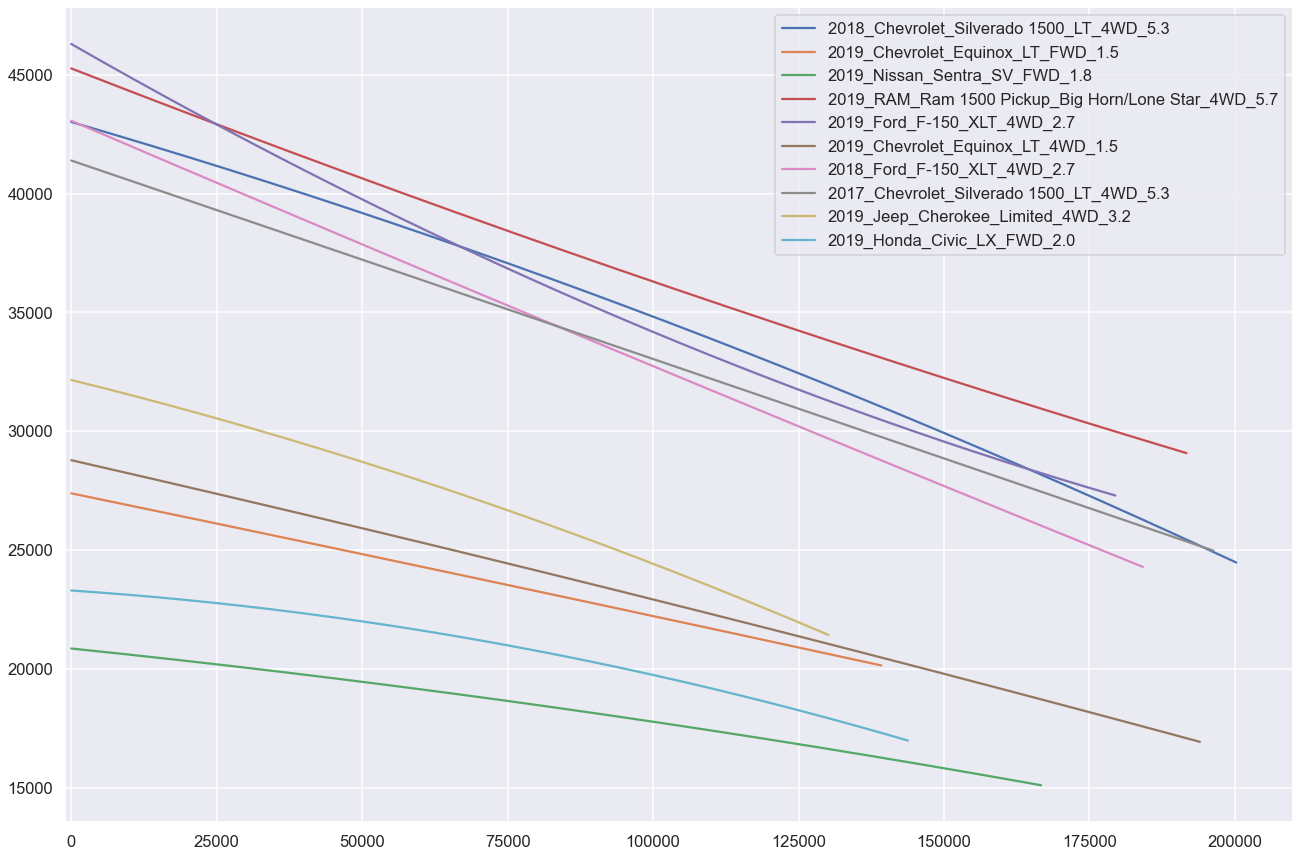

In [14]:
# Iterate over the list we created in the last cell to plot each respective line
for tup in fitted_lines:
    # Used regex to filter out all the 2020 vehicles, they were too new, and didn’t have enough data past ~75k miles  
    if re.match('^2020', tup[0]):
        continue
    car, poly_reg, line = tup
    plt.plot(line, poly_reg(line), label=car)
    
plt.gcf().set_size_inches(22, 15)
plt.legend()
plt.xlim(-1000, 210000)
plt.show()